In [69]:
import os,sys,glob
from imview import pltlib
from pygeotools.lib import geolib,iolib,malib,warplib
import matplotlib.pyplot as plt
from demcoreg import coreglib

In [78]:
peak_ref_dem = '/nobackup/sbhusha1/skysat_video/paper_analysis/20190428_dg_mgm_peak.tif'
dx = +1.50
dy = -0.19
dz = -0.74

In [79]:
peak_ref_dem_ds = iolib.fn_getds(peak_ref_dem)
src_dem_ds_align = iolib.mem_drv.CreateCopy('', peak_ref_dem_ds, 0)
src_dem_ds_align = coreglib.apply_xy_shift(src_dem_ds_align, dx, dy, createcopy=False)
src_dem_ds_align = coreglib.apply_z_shift(src_dem_ds_align,dz,createcopy=False)

X shift:  1.5
Y shift:  -0.19
Original geotransform: (557993.0, 2.0, 0.0, 5121679.0, 0.0, -2.0)
Updated geotransform: [ 5.57994500e+05  2.00000000e+00  0.00000000e+00  5.12167881e+06
  0.00000000e+00 -2.00000000e+00]
Z shift offset:  -0.74


In [80]:
peak_dem_updated = os.path.splitext(peak_ref_dem)[0]+f'_registered_dx_{dx}_dy_{dy}_dz_{dz}_aligned22m_ref.tif'
iolib.writeGTiff(iolib.ds_getma(src_dem_ds_align), peak_dem_updated, src_dem_ds_align)

In [81]:
skysat_dem_corrected = '/nobackup/sbhusha1/skysat_video/paper_analysis/20190420_peak_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_source-DEM.tif'
skysat_dem_corrected2 = '/nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/full_dem_coreg_corrected_for2m_alignment/run-trans_source-DEM.tif'

In [83]:
ds_list = warplib.memwarp_multi_fn([peak_dem_updated,skysat_dem_corrected])


Warping all inputs to the following:
Resolution: 2.0
Extent: [560835.0, 5114997.0, 564143.0, 5117341.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackup/sbhusha1/skysat_video/paper_analysis/20190428_dg_mgm_peak_registered_dx_1.5_dy_-0.19_dz_-0.74_aligned22m_ref.tif
nl: 1172 ns: 1654 res: 2.000
2 of 2: /nobackup/sbhusha1/skysat_video/paper_analysis/20190420_peak_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_source-DEM.tif


In [84]:
ds_list2 = warplib.memwarp_multi_fn([peak_dem_updated,skysat_dem_corrected2])


Warping all inputs to the following:
Resolution: 2.0
Extent: [560837.0, 5114995.0, 564143.0, 5117341.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackup/sbhusha1/skysat_video/paper_analysis/20190428_dg_mgm_peak_registered_dx_1.5_dy_-0.19_dz_-0.74_aligned22m_ref.tif
nl: 1173 ns: 1653 res: 2.000
2 of 2: /nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/full_dem_coreg_corrected_for2m_alignment/run-trans_source-DEM.tif


In [7]:
dem_diff = iolib.ds_getma(ds_list[0]) - iolib.ds_getma(ds_list[1])

In [85]:
dem_diff2 = iolib.ds_getma(ds_list2[0]) - iolib.ds_getma(ds_list2[1])

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


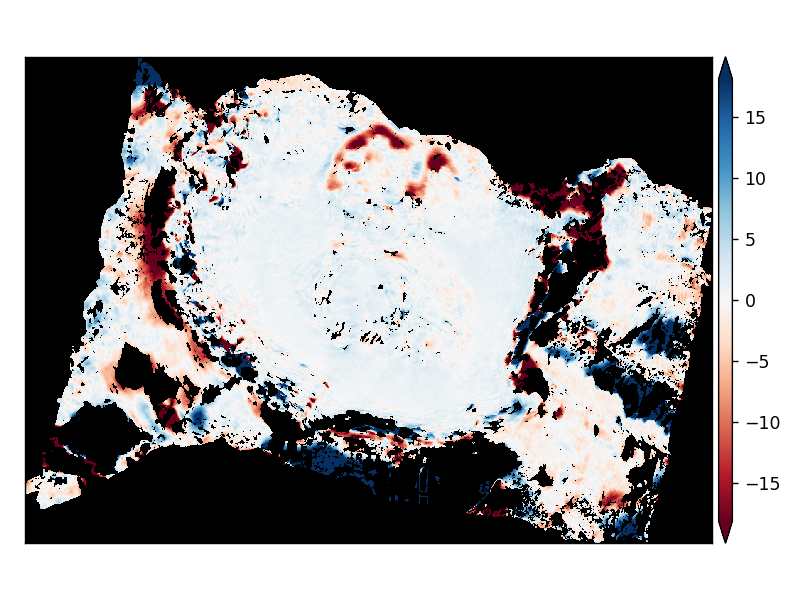

In [10]:
f,ax = plt.subplots()
pltlib.iv(dem_diff,ax=ax,cmap='RdBu')

In [11]:
malib.get_stats_dict(dem_diff)

{'count': 980390,
 'min': -148.71044921875,
 'max': 133.978759765625,
 'ptp': 282.689208984375,
 'mean': 0.18630621437562475,
 'std': 9.575863485425861,
 'nmad': 1.7076504272460937,
 'med': 0.5849609375,
 'median': 0.5849609375,
 'p16': -2.2294921875,
 'p84': 2.158935546875,
 'spread': 2.1942138671875,
 'mode': 0.99658203125}

<IPython.core.display.Javascript object>


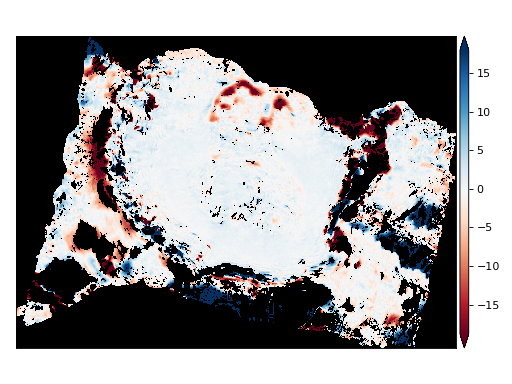

In [86]:
f,ax = plt.subplots()
pltlib.iv(dem_diff2,ax=ax,cmap='RdBu')

In [87]:
malib.get_stats_dict(dem_diff2)

{'count': 981699,
 'min': -149.244140625,
 'max': 131.77587890625,
 'ptp': 281.02001953125,
 'mean': -0.23792851804109189,
 'std': 9.646796037153228,
 'nmad': 1.608201123046875,
 'med': 0.165283203125,
 'median': 0.165283203125,
 'p16': -2.634804687500001,
 'p84': 1.688720703125,
 'spread': 2.1617626953125004,
 'mode': 0.405029296875}

In [34]:
980369*2*2*1e-6

3.9214759999999997

<IPython.core.display.Javascript object>


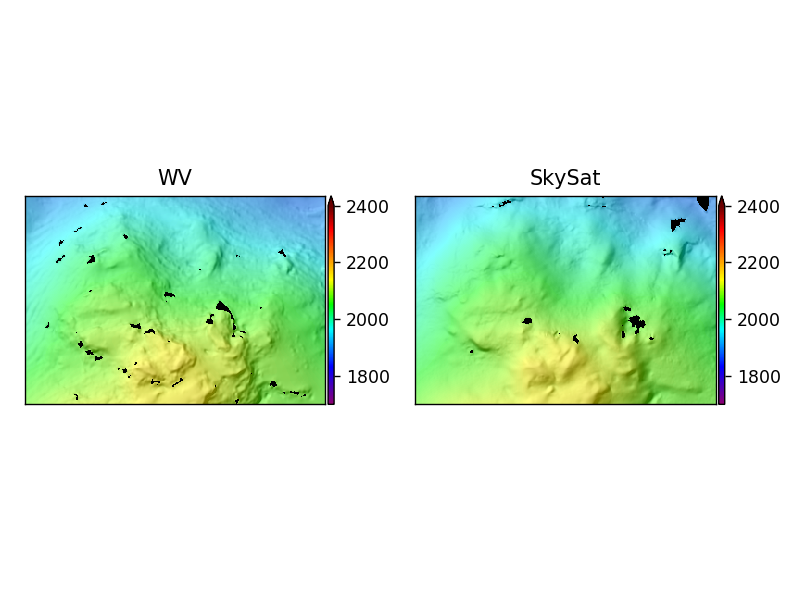

In [26]:
f,ax = plt.subplots(1,2,sharex=True,sharey=True)
pltlib.iv_ds(ds_list[0],ax=ax[0],hillshade=True,full=True,clim=(1700,2400),title='WV',scalebar=False)
pltlib.iv_ds(ds_list[1],ax=ax[1],hillshade=True,full=True,clim=(1700,2400),title='SkySat',scalebar=False)


### Fall corrected 

In [21]:
fall_ref = '/nobackup/sbhusha1/skysat_video/fall_sthelens_video/output/video/st_helens_ref.tif'
skysat_fall = '/nobackup/sbhusha1/skysat_video/paper_analysis/20191001_fall_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_reference-DEM.tif'
fall_ds_list = warplib.memwarp_multi_fn([skysat_fall,fall_ref])


Warping all inputs to the following:
Resolution: 2.0
Extent: [560009.0, 5114453.0, 564297.0, 5117733.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackup/sbhusha1/skysat_video/paper_analysis/20191001_fall_filtered_correction_direc_updated_crater_trim_nmad5_count2-trans_reference-DEM.tif
2 of 2: /nobackup/sbhusha1/skysat_video/fall_sthelens_video/output/video/st_helens_ref.tif
nl: 1640 ns: 2144 res: 2.000


In [56]:
fall_ref2 = '/nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/reference2m_dems/2012_2015_aligned_dem_med_mos.tif'
fall_ref2_non_glac = '/nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/reference2m_dems/2012_2015_aligned_dem_med_mos_non_glac_shpclip.tif'
fall_skysat2 = '/nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/fall_aligned2m_huge_dh_removed/run-trans_source-DEM.tif'
fall_ds_list2 = warplib.memwarp_multi_fn([fall_skysat2,fall_ref2,fall_ref2_non_glac])


Warping all inputs to the following:
Resolution: 2.0
Extent: [560009.0, 5114451.0, 564299.0, 5117731.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 3: /nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/fall_aligned2m_huge_dh_removed/run-trans_source-DEM.tif
2 of 3: /nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/reference2m_dems/2012_2015_aligned_dem_med_mos.tif
nl: 1640 ns: 2145 res: 2.000
3 of 3: /nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/reference2m_dems/2012_2015_aligned_dem_med_mos_non_glac_shpclip.tif
nl: 1640 ns: 2145 res: 2.000


In [22]:
fall_diff = iolib.ds_getma(fall_ds_list[0]) - iolib.ds_getma(fall_ds_list[1])


<IPython.core.display.Javascript object>


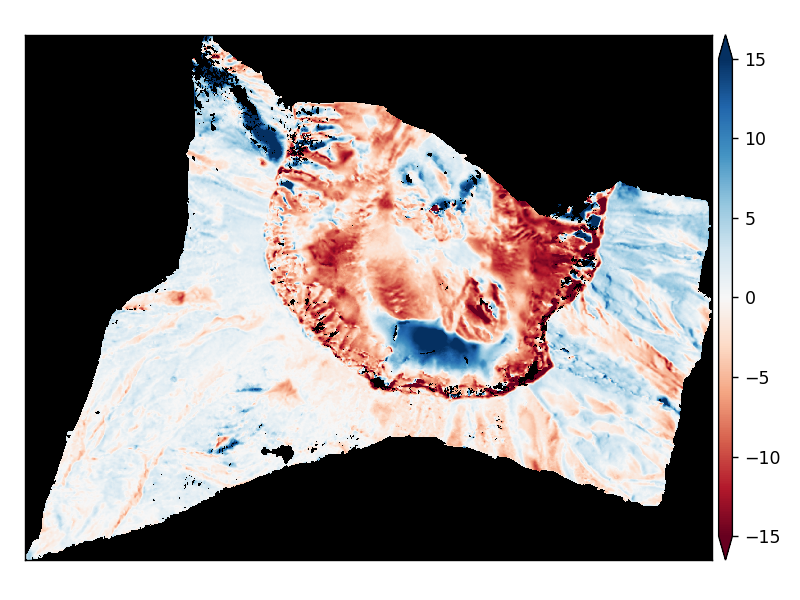

In [24]:
f,ax = plt.subplots()
pltlib.iv(fall_diff,ax=ax,cmap='RdBu',clim=(-15,15))

<IPython.core.display.Javascript object>


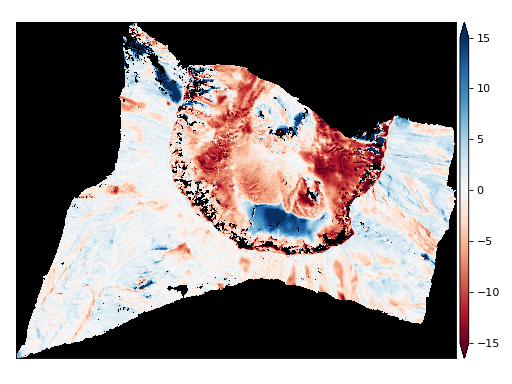

In [57]:
fall_diff2 = iolib.ds_getma(fall_ds_list2[0]) - iolib.ds_getma(fall_ds_list2[1])
fall_diff2_ref = iolib.ds_getma(fall_ds_list2[0]) - iolib.ds_getma(fall_ds_list2[2])
f,ax = plt.subplots()
pltlib.iv(fall_diff2,ax=ax,cmap='RdBu',clim=(-15,15))

<IPython.core.display.Javascript object>


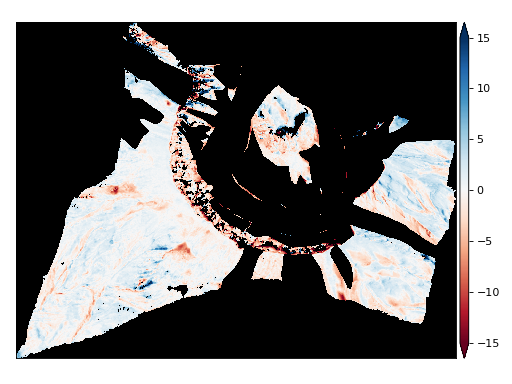

In [58]:
f,ax = plt.subplots()
pltlib.iv(fall_diff2_ref,ax=ax,cmap='RdBu',clim=(-15,15))

In [47]:
outfn = '/nobackup/sbhusha1/skysat_video/paper_analysis/last_minute/fall_dh_signal_with_real_signs.tif'
iolib.writeGTiff(fall_diff2_ref,outfn,fall_ds_list2[0])

In [59]:
malib.get_stats_dict(fall_diff2_ref)

{'count': 1167519,
 'min': -67.180419921875,
 'max': 44.7088623046875,
 'ptp': 111.8892822265625,
 'mean': 0.048542819380609385,
 'std': 2.9564424564050977,
 'nmad': 1.831170263671875,
 'med': 0.302490234375,
 'median': 0.302490234375,
 'p16': -1.982177734375,
 'p84': 2.0625,
 'spread': 2.0223388671875,
 'mode': 0.343505859375}

<IPython.core.display.Javascript object>


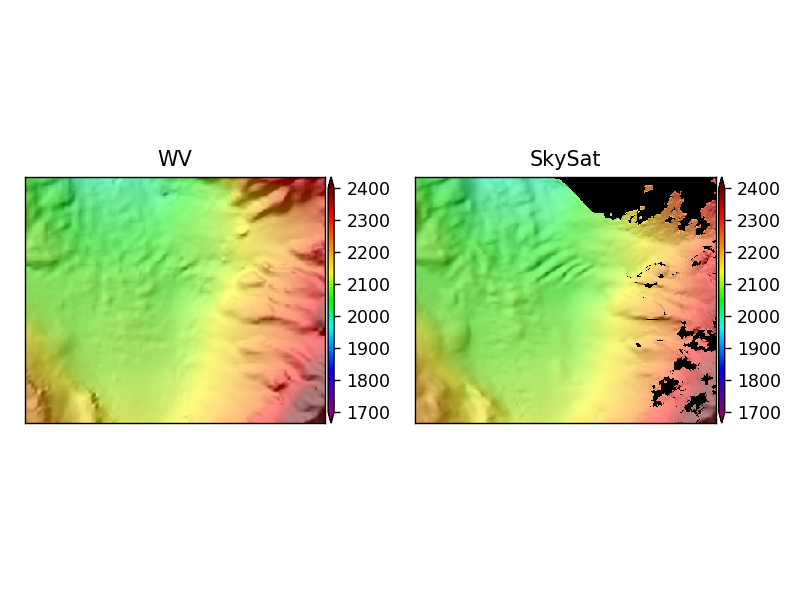

In [28]:
f,ax = plt.subplots(1,2,sharex=True,sharey=True)
pltlib.iv_ds(fall_ds_list[1],ax=ax[0],hillshade=True,full=True,clim=(1700,2400),title='WV',scalebar=False)
pltlib.iv_ds(fall_ds_list[0],ax=ax[1],hillshade=True,full=True,clim=(1700,2400),title='SkySat',scalebar=False)


In [88]:
ds_coreg_list = warplib.memwarp_multi_fn([fall_skysat2,skysat_dem_corrected2])
diff = iolib.ds_getma(ds_coreg_list[0]) - iolib.ds_getma(ds_coreg_list[1])


Warping all inputs to the following:
Resolution: 2.0
Extent: [560837.0, 5114995.0, 564143.0, 5117341.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/fall_aligned2m_huge_dh_removed/run-trans_source-DEM.tif
nl: 1173 ns: 1653 res: 2.000
2 of 2: /nobackupp2/sbhusha1/skysat_video/paper_analysis/last_minute/full_dem_coreg_corrected_for2m_alignment/run-trans_source-DEM.tif


<IPython.core.display.Javascript object>


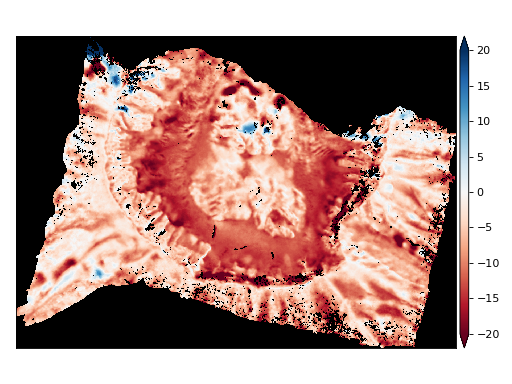

In [72]:
f,ax = plt.subplots()
pltlib.iv(diff,cmap='RdBu',clim=(-20,20),ax=ax)

<IPython.core.display.Javascript object>


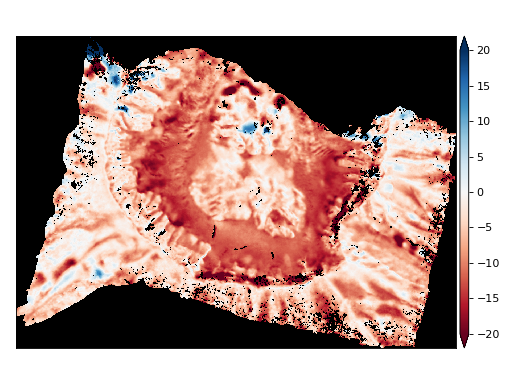

In [89]:
f,ax = plt.subplots()
pltlib.iv(diff,cmap='RdBu',clim=(-20,20),ax=ax)